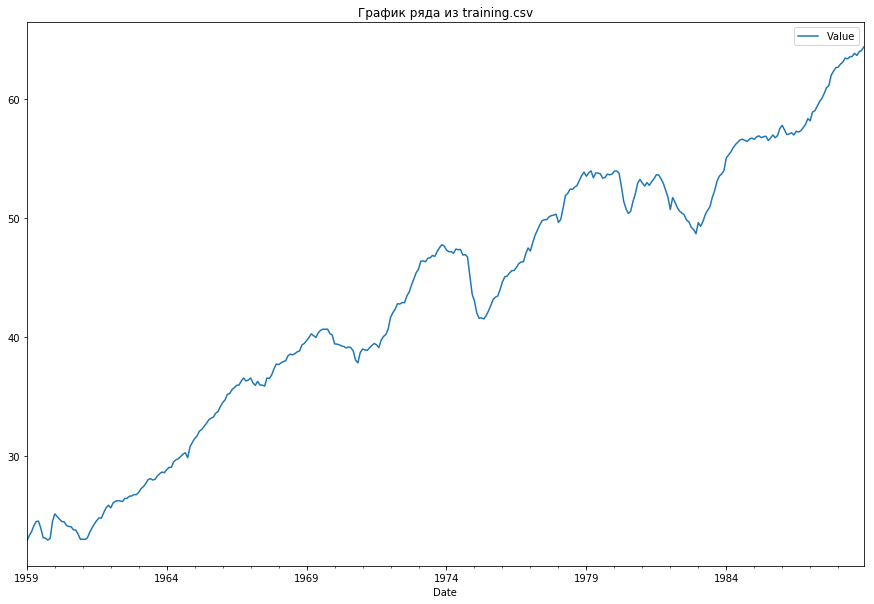

Результаты теста Дики-Фуллера
adf:  -0.253391179928
p-value:  0.931851042299
Critical values:  {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459002}
есть единичные корни, ряд не стационарен



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.iolib.table import SimpleTable
import statsmodels.api as sma
import statsmodels.tsa.stattools as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import r2_score

testing = pd.read_csv('testing.csv', parse_dates=['Date'], index_col='Date')
d = pd.read_csv('training.csv', parse_dates=['Date'], index_col='Date')
d.plot(figsize=(15, 10))

plt.title('График ряда из training.csv')
plt.show()
d.to_csv('out.csv')

# iloc объединяет все в один массив
test = sm.adfuller(d.iloc[:, 0].values, autolag='AIC')
print("Результаты теста Дики-Фуллера")
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

print()


# Аддитивная модель

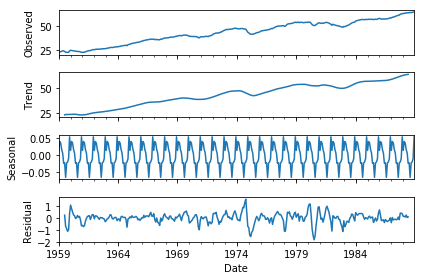

Тренд
adf:  -0.861576033358
p-value:  0.800362576153
Critical values:  {'1%': -3.4503224123605194, '5%': -2.8703384787266608, '10%': -2.5714576124885218}
есть единичные корни, ряд не стационарен

Сезонность
adf:  -9.23118051274e+14
p-value:  0.0
Critical values:  {'1%': -3.4492815848836296, '5%': -2.8698813715275406, '10%': -2.5712138845950587}
единичных корней нет, ряд стационарен

остаток
adf:  -7.48556383377
p-value:  4.64909667469e-11
Critical values:  {'1%': -3.4496162602188187, '5%': -2.870028369720798, '10%': -2.5712922615505627}
единичных корней нет, ряд стационарен



In [3]:
result_a = seasonal_decompose(d, model='additive')
result_a.plot()
plt.show()
result_a.trend.dropna(inplace=True)  # удаляет значения nan и inf
result_a.seasonal.dropna(inplace=True)
result_a.resid.dropna(inplace=True)

print('Тренд')
test = sm.adfuller(result_a.trend.iloc[:, 0].values, autolag='AIC')
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

print()

print('Сезонность')
test = sm.adfuller(result_a.seasonal.iloc[:, 0].values, autolag='AIC')
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

print()

print('остаток')
test = sm.adfuller(result_a.resid.iloc[:, 0].values, autolag='AIC')
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

print()


# Мультипликативная модель

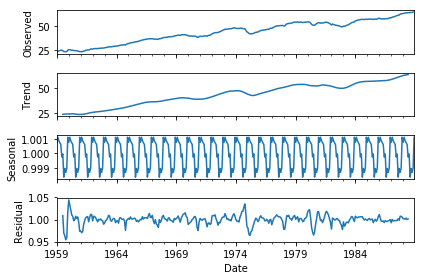

Тренд
adf:  -0.861576033358
p-value:  0.800362576153
Critical values:  {'1%': -3.4503224123605194, '5%': -2.8703384787266608, '10%': -2.5714576124885218}
есть единичные корни, ряд не стационарен

Сезонность
adf:  -3.63607124269e+13
p-value:  0.0
Critical values:  {'1%': -3.4493365542737222, '5%': -2.8699055166063085, '10%': -2.5712267582157482}
единичных корней нет, ряд стационарен

остаток
adf:  -7.46608373978
p-value:  5.20019389833e-11
Critical values:  {'1%': -3.4496162602188187, '5%': -2.870028369720798, '10%': -2.5712922615505627}
единичных корней нет, ряд стационарен



In [4]:
result_m = seasonal_decompose(d, model='multiplicative')
result_m.plot()
plt.show()
result_m.trend.dropna(inplace=True)
result_m.seasonal.dropna(inplace=True)
result_m.resid.dropna(inplace=True)

print('Тренд')
test = sm.adfuller(result_m.trend.iloc[:, 0].values, autolag='AIC')
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

print()

print('Сезонность')
test = sm.adfuller(result_m.seasonal.iloc[:, 0].values, autolag='AIC')
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

print()

print('остаток')
test = sm.adfuller(result_m.resid.iloc[:, 0].values, autolag='AIC')
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

print()


разностный ряд порядка 1
adf:  -7.36731149521
p-value:  9.1641495611e-11
Critical values:  {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459002}
единичных корней нет, ряд стационарен


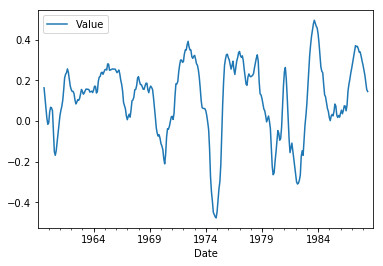

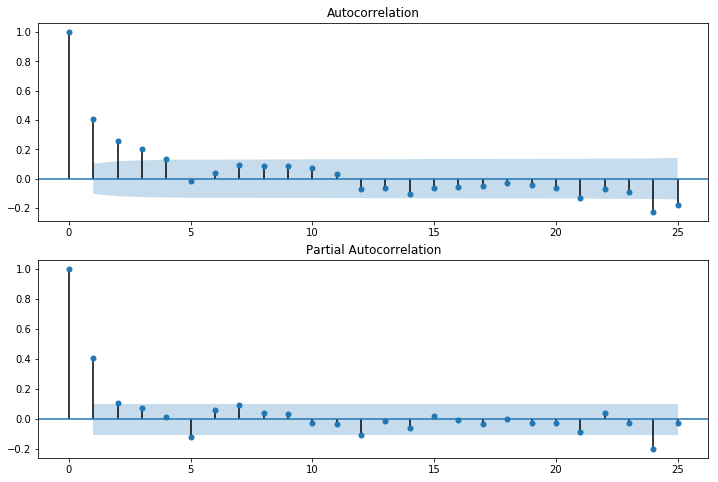

In [5]:
print('разностный ряд порядка 1')
d_diff1 = d.diff(periods=1).dropna()
test = sm.adfuller(d_diff1.iloc[:, 0].values, autolag='AIC')
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

res = seasonal_decompose(d_diff1, model='additive')
res.trend.plot()
plt.show()

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sma.graphics.tsa.plot_acf(d_diff1.values.squeeze(),
                                lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sma.graphics.tsa.plot_pacf(d_diff1, lags=25, ax=ax2)
plt.show()


                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                  359
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -120.367
Method:                       css-mle   S.D. of innovations              0.338
Date:                Sat, 09 Dec 2017   AIC                            248.734
Time:                        16:37:17   BIC                            264.267
Sample:                    02-01-1959   HQIC                           254.911
                         - 12-01-1988                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1176      0.036      3.271      0.001       0.047       0.188
ar.L1.D.Value     0.6531      0.091      7.185      0.000       0.475       0.831
ma.L1.D.Value    -0.2984      0.115     

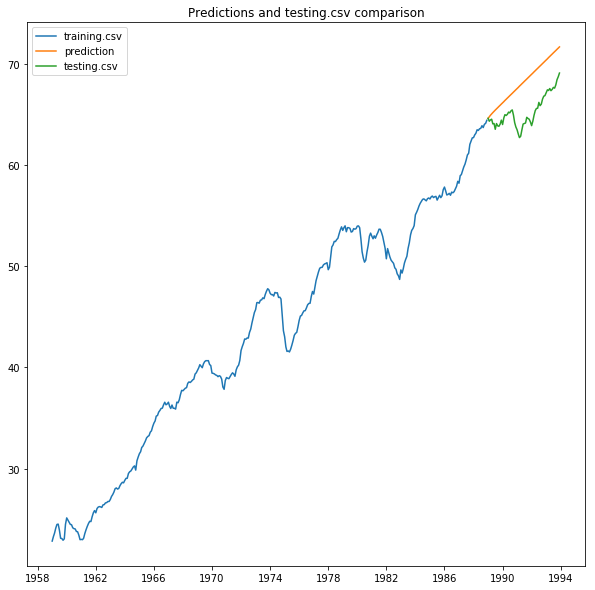

In [19]:
model1 = ARIMA(d, order=(1, 1, 1)).fit(disp=0)
print(model1.summary())

pred1 = model1.predict('1989-01-01', '1993-12-01',
                       typ='levels', dynamic=True)
# print(pred1)
print()
r2 = r2_score(testing, pred1)
print('R2 score =', r2)
print("AIC=", model1.aic)


fig, axes = plt.subplots(1, figsize=(10, 10))
axes.plot(d, label='training.csv')
axes.plot(pred1, label='prediction')
axes.plot(testing, label='testing.csv')
axes.set_title('Predictions and testing.csv comparison')
axes.legend(loc=2)
plt.show()


                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                  359
Model:                ARIMA(10, 1, 1)   Log Likelihood                -109.906
Method:                       css-mle   S.D. of innovations              0.327
Date:                Sat, 09 Dec 2017   AIC                            245.812
Time:                        16:38:13   BIC                            296.295
Sample:                    02-01-1959   HQIC                           265.887
                         - 12-01-1988                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1092      0.005     20.076      0.000       0.099       0.120
ar.L1.D.Value      1.3226      0.053     25.134      0.000       1.219       1.426
ar.L2.D.Value     -0.2520      0.087

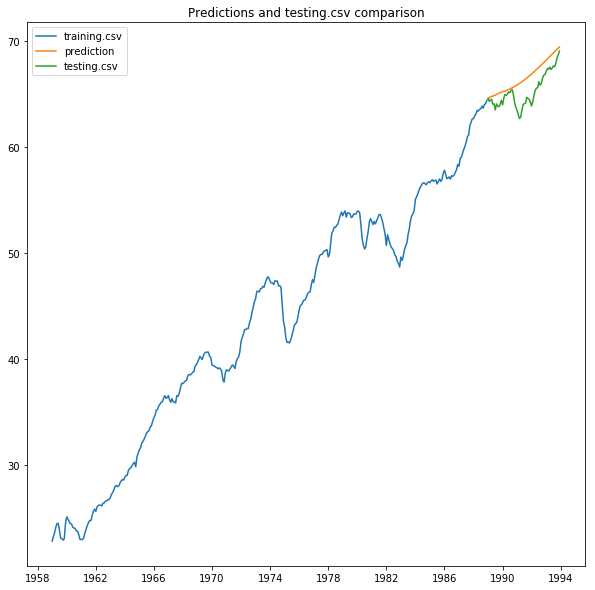

In [20]:
model2 = ARIMA(d, order=(10, 1, 1)).fit(disp=0)
print(model2.summary())

pred2 = model2.predict('1989-01-01', '1993-12-01',
                       typ='levels', dynamic=True)
# print(pred1)
print()
r2 = r2_score(testing, pred2)
print('R2 score =', r2)
print("AIC=", model2.aic)


fig, axes = plt.subplots(1, figsize=(10, 10))
axes.plot(d, label='training.csv')
axes.plot(pred2, label='prediction')
axes.plot(testing, label='testing.csv')
axes.set_title('Predictions and testing.csv comparison')
axes.legend(loc=2)
plt.show()
